In [ ]:
# load libraries
import pandas as pd
pd.options.mode.chained_assignment = None

**MultiOutput KNN model of Pharmasuticals Data of 2014**


Regression Metrics for Concentration:
Mean Squared Error (MSE): 1.0988431161012617
R² Score: 0.13494099933483272

Classification Metrics for Drug:
Accuracy: 0.9932475292095517
F1 Score: 0.996612118349999
Recall: 0.9999175971323802

Confusion Matrix:
[[    3   326]
 [    4 48538]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
217240              0.000024                 0.000853          145   
216189              0.000739                 0.000582          274   
179156              0.000604                 0.000068          130   
192999              0.001450                 0.001693          334   
220253              0.000008                 0.000045          113   

        Predicted_Drug Predicted_Drug_Name Actual_Drug_Name  
217240           162.2      INSULIN LISPRO       GUANFACINE  
216189           270.6         PROPAFENONE       QUETIAPINE  
179156           188.6          LOPERAMIDE     FLUOCINONIDE  
192999

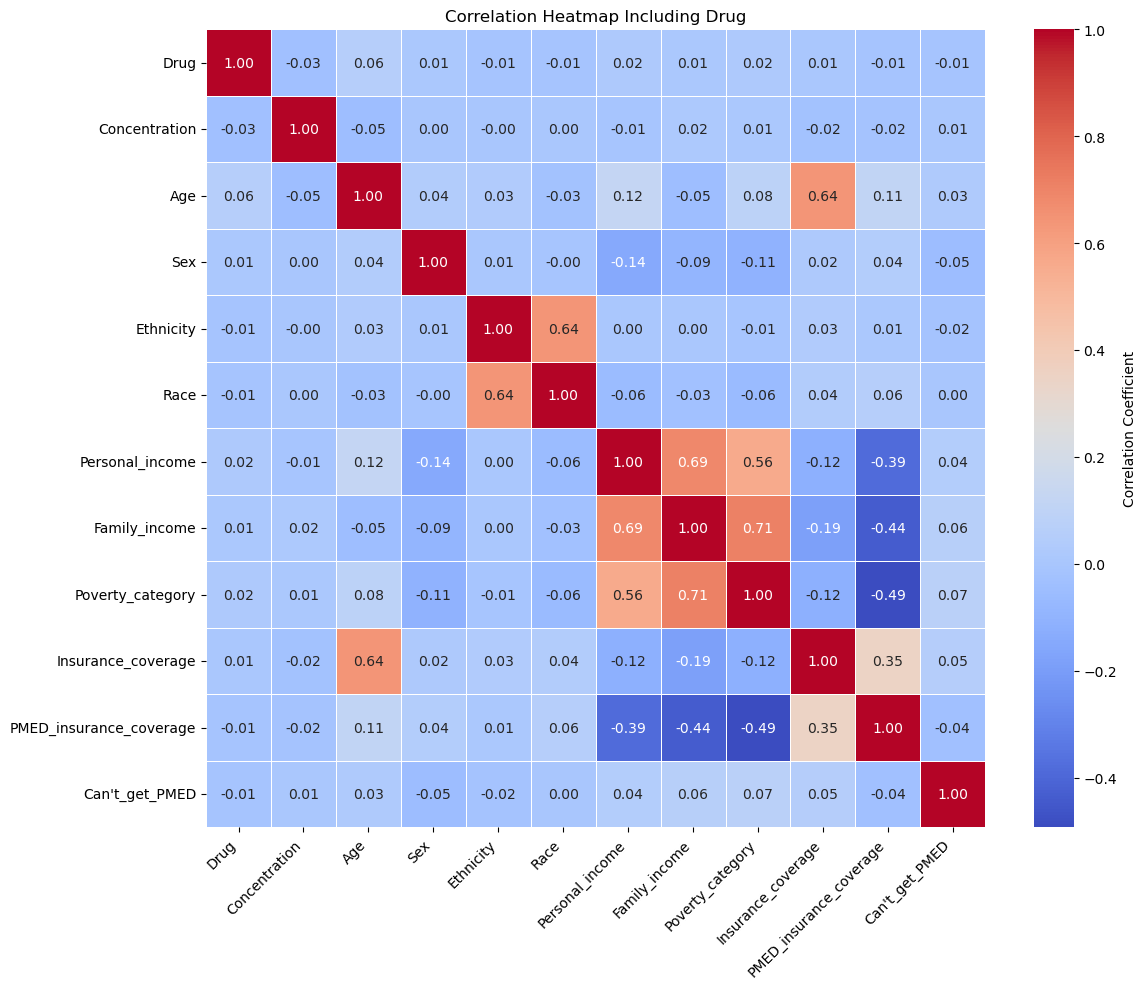

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2014.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Race', 'Personal_income', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_get_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_get_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_scaled)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2014.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Runing by reducing the features**


Regression Metrics for Concentration:
Mean Squared Error (MSE): 1.0891264563408305
R² Score: 0.14259033500104934

Classification Metrics for Drug:
Accuracy: 0.9932475292095517
F1 Score: 0.996612118349999
Recall: 0.9999175971323802

Confusion Matrix:
[[    3   326]
 [    4 48538]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
217240              0.000024                 0.000853        145.0   
216189              0.000739                 0.000582        274.0   
179156              0.000604                 0.000244        130.0   
192999              0.001450                 0.001693        334.0   
220253              0.000008                 0.000076        113.0   

        Predicted_Drug Predicted_Drug_Name Actual_Drug_Name  
217240           162.2      INSULIN LISPRO       GUANFACINE  
216189           270.6         PROPAFENONE       QUETIAPINE  
179156           191.8            LOSARTAN     FLUOCINONIDE  
192999

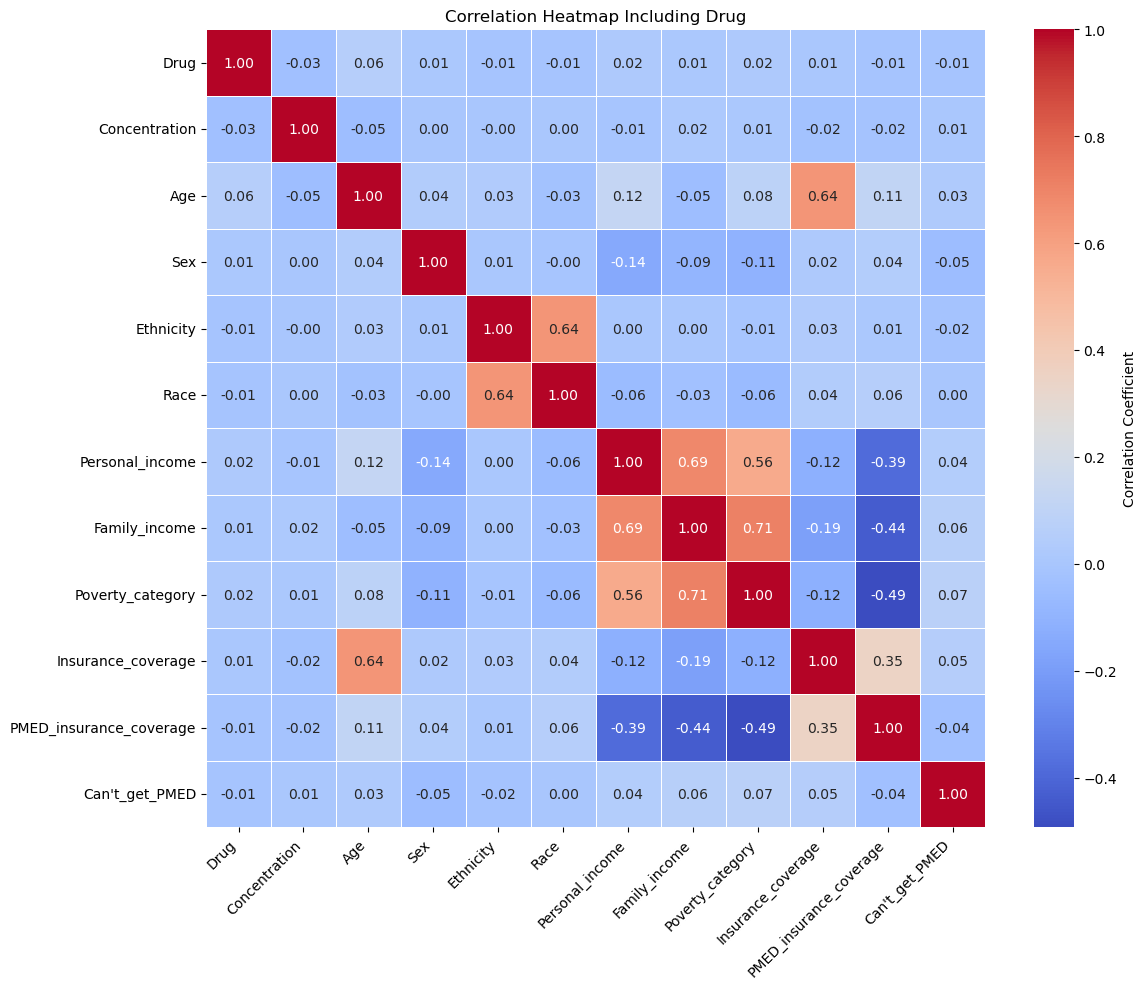

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2014.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Race', 'Personal_income', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'Can\'t_get_PMED']]
y = df[['Concentration', 'Drug']]

# Drop rows with missing values in any of the features or target variables (if any)
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN in target variables
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Use SimpleImputer to handle any NaN values in the features (X) and target (y)
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_scaled)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2014.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Analysing:

Upon removing the `PMED_insurance_coverage` attribute, the model's efficiency in evaluating `Concentration` improved. This was evident as the **MSE** marginally decreased and the **$R^2$** value increased. However, the **F1 Score**, **Accuracy**, and **Precision** remained unchanged.  


## Visualization for Drug Classification

**Confusion Matrix, Actual vs. Predicted Trends (Line Plot), and Predicted vs. Actual Frequencies (Bar Plot)**

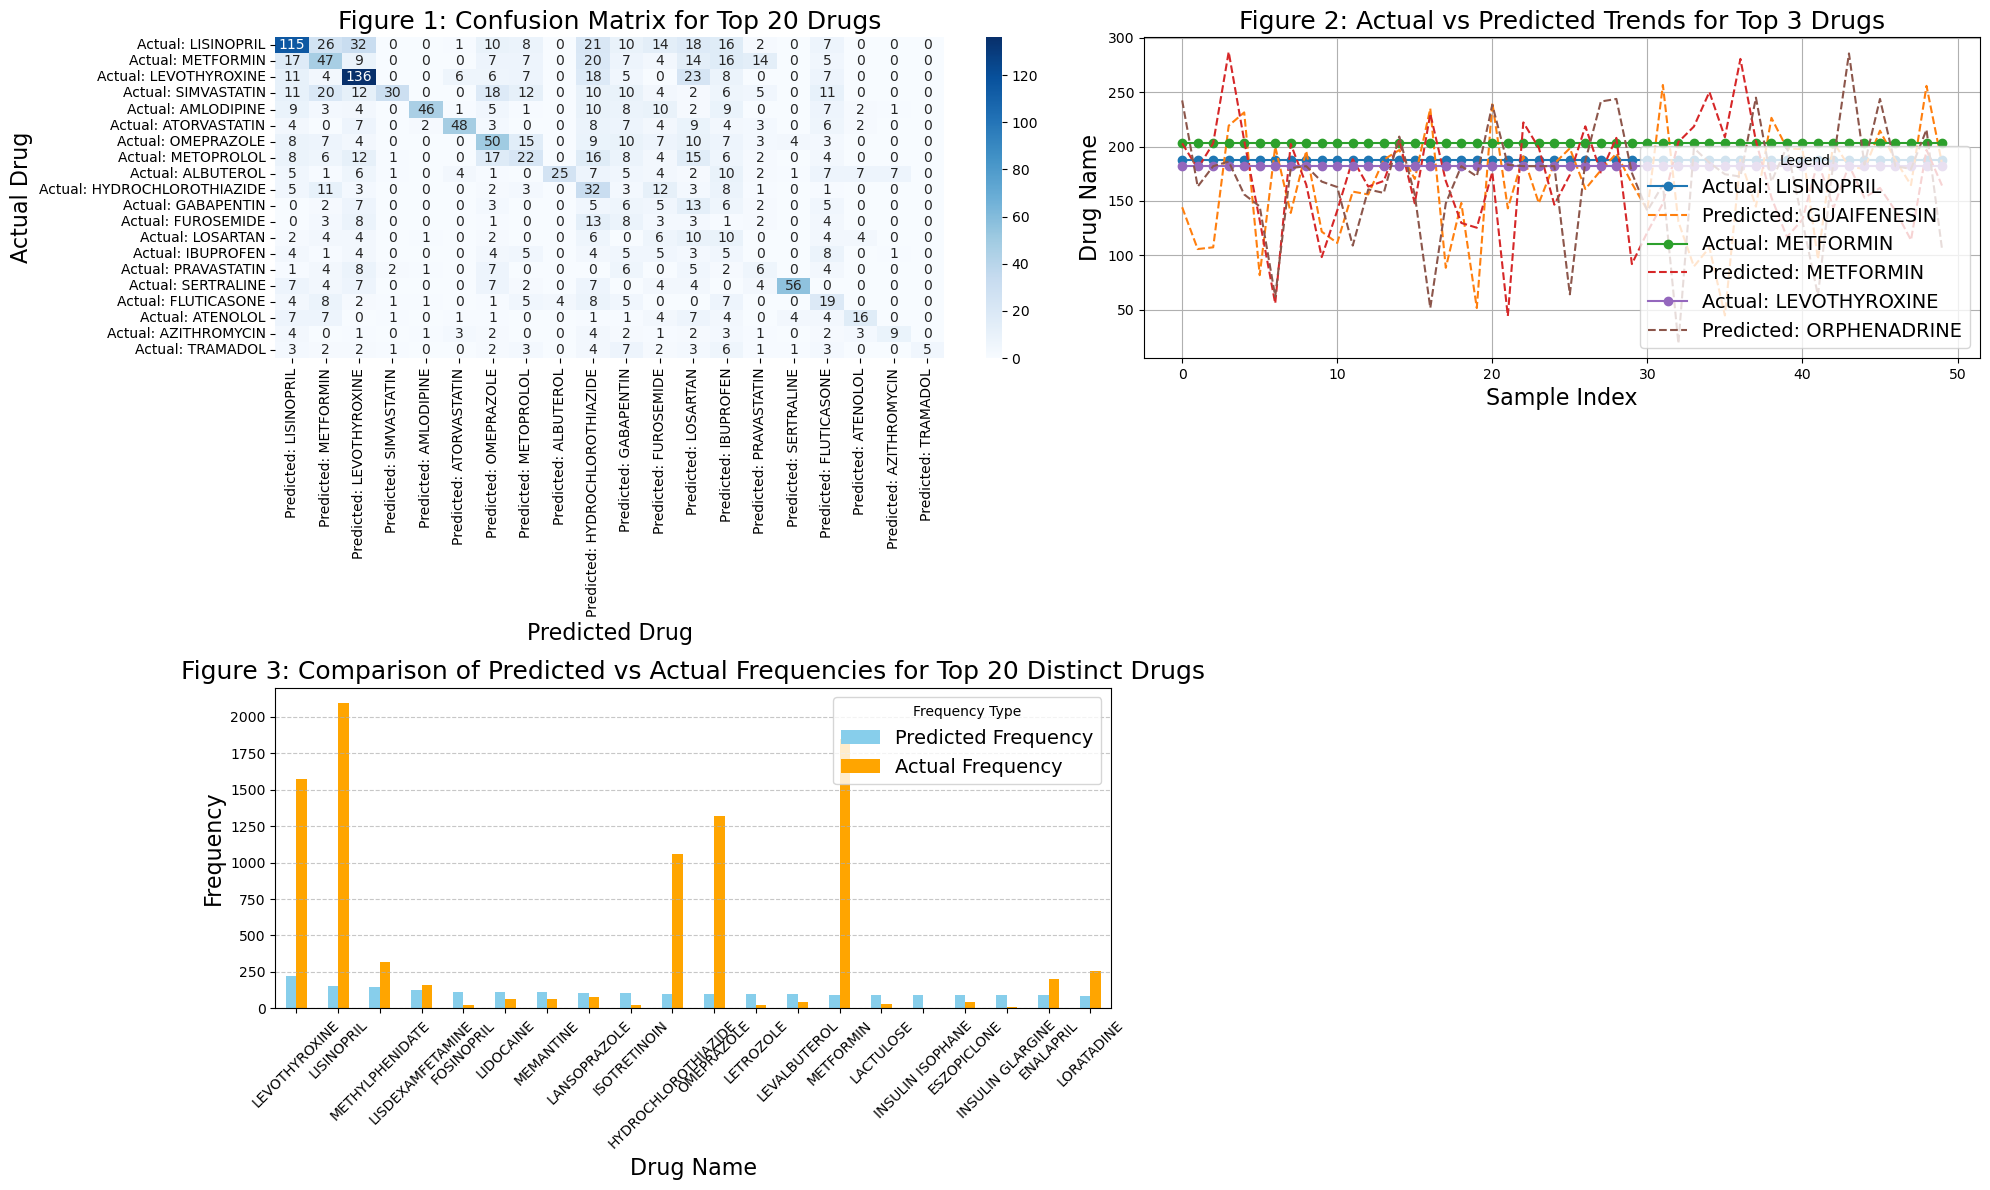

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Assuming `df_cleaned`, `y_test`, `y_pred`, and `encoder` are already defined.

# Create a 2x2 grid for the plots, but only use 3 spaces with larger figsize
fig, axes = plt.subplots(2, 2, figsize=(24, 18))  # Increased the figsize to make all plots larger

# ---- Common Block to Calculate Top Drugs ----
top_n = 20  # You can change this to 10, 5, or any other number as required
top_drugs = df_cleaned['Drug'].value_counts().nlargest(top_n).index

# ---- Figure 1: Confusion Matrix for Top Drugs ----
filtered_y_test = y_test[y_test['Drug'].isin(top_drugs)]['Drug']
filtered_y_pred = y_pred[:, 1][np.isin(y_test['Drug'], top_drugs)].round()
conf_matrix = confusion_matrix(filtered_y_test, filtered_y_pred, labels=top_drugs)

sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[f"Predicted: {encoder.inverse_transform([int(label)])[0]}" for label in top_drugs],
    yticklabels=[f"Actual: {encoder.inverse_transform([int(label)])[0]}" for label in top_drugs],
    ax=axes[0, 0]
)
axes[0, 0].set_title(f"Figure 1: Confusion Matrix for Top {top_n} Drugs", fontsize=18)
axes[0, 0].set_xlabel("Predicted Drug", fontsize=16)
axes[0, 0].set_ylabel("Actual Drug", fontsize=16)

# ---- Figure 2: Actual vs Predicted Trends for Top Drugs ----
for drug in top_drugs[:3]:  # Limiting to the top 5 for this graph
    actual_indices = y_test['Drug'] == drug
    actual = y_test.loc[actual_indices, 'Drug'].head(50).values
    predicted = y_pred[actual_indices, 1][:50]
    if len(actual) > 0:
        axes[0, 1].plot(
            range(len(actual)),
            actual,
            label=f"Actual: {encoder.inverse_transform([drug])[0]}",
            marker='o'
        )
        axes[0, 1].plot(
            range(len(predicted)),
            predicted,
            label=f"Predicted: {encoder.inverse_transform([int(predicted[0])])[0]}",
            linestyle='--'
        )
axes[0, 1].set_title(f"Figure 2: Actual vs Predicted Trends for Top 3 Drugs", fontsize=18)
axes[0, 1].set_xlabel("Sample Index", fontsize=16)
axes[0, 1].set_ylabel("Drug Name", fontsize=16)
axes[0, 1].legend(title="Legend", fontsize=14)
axes[0, 1].grid()

# ---- Figure 3: Bar Plot for Top Drugs ----
top_predicted_drugs = pd.Series(y_pred[:, 1]).value_counts().sort_values(ascending=False)
top_actual_frequencies = y_test['Drug'].value_counts()
common_drugs = top_predicted_drugs.index.intersection(top_actual_frequencies.index)

distinct_predicted_drugs = top_predicted_drugs.loc[common_drugs].head(top_n)
distinct_actual_frequencies = top_actual_frequencies.loc[common_drugs].head(top_n)

# Decode drug names using the LabelEncoder
decoded_drug_names = encoder.inverse_transform(distinct_predicted_drugs.index.astype(int))

# Create a comparison DataFrame for distinct drugs
comparison_df = pd.DataFrame({
    'Drug': decoded_drug_names,  # Use drug names for better readability
    'Predicted Frequency': distinct_predicted_drugs.values,
    'Actual Frequency': distinct_actual_frequencies.values
})

# Plot the comparison bar chart with a larger size
comparison_df.set_index('Drug').plot(kind='bar', figsize=(20, 12), rot=45, color=['skyblue', 'orange'], ax=axes[1, 0])
axes[1, 0].set_title(f"Figure 3: Comparison of Predicted vs Actual Frequencies for Top {top_n} Distinct Drugs", fontsize=18)
axes[1, 0].set_xlabel("Drug Name", fontsize=16)
axes[1, 0].set_ylabel("Frequency", fontsize=16)
axes[1, 0].legend(title="Frequency Type", loc='upper right', fontsize=14)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Remove the extra plot (bottom-right corner) to leave only 3 plots
fig.delaxes(axes[1, 1])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Analysis:

**Figure 1: Confusion Matrix**

The confusion matrix for the top 10 predicted drugs, shows that the model well performed in classifying the drugs. 
For common drugs such as **Levothyroxine, Metformin, and Lisinopril** its more likely to be correctly predicted, with fewer misclassifications while such as **Amoxicillin** and **Simvastatin**, have some off-diagonal elements suggesting the model occasionally predicts them incorrectly for drugs like **Hydrochlorothiazide** and **Amlodipine**. **This implies that the model is more accurate for frequently appearing drugs but struggles with less common or similarly labeled drugs.**

**Figure 2: Line Plot: Actual vs Predicted**

The next plot that for each of the drugs - Metformin, Levothyroxine, we see distinct trends in both actual and predicted values. For Metformin show a relatively close match between actual and predicted values, suggesting that the model performs well for these drugs. However, other drugs like Levothyroxine show a slight divergence between actual and predicted values, this suggests that the model might not be capturing all the features in the data for those particular drugs, possibly due to complex or less frequent interactions. Despite this, the overall model's performance for the most common drugs indicates a solid prediction ability.

**Figure 3: Bar Plot: Predicted vs Actual Frequencies**

This bar plot shows a significant differences between the predicted and actual frequencies for some drug. For instance, drugs like **Amlodipine** and **Simvastatin** show very close alignment between the predicted and actual frequencies, showing the model is **able to handle commonly encountered drugs quite accurately**. However, drugs like **Hydrochlorothiazide** and **Levothyroxine** show discrepancies, with predicted frequencies much higher than the actual ones, possibly reflecting an overestimation by the model for these particular drugs this shows for rarer drugs the model tends to **over-predict for certain drugs**, possibily due to the class imbalance or insufficient representation of rare drug classes in the dataset.

## Visualization For Concentration Regression

Predicted vs Actual for Concentration

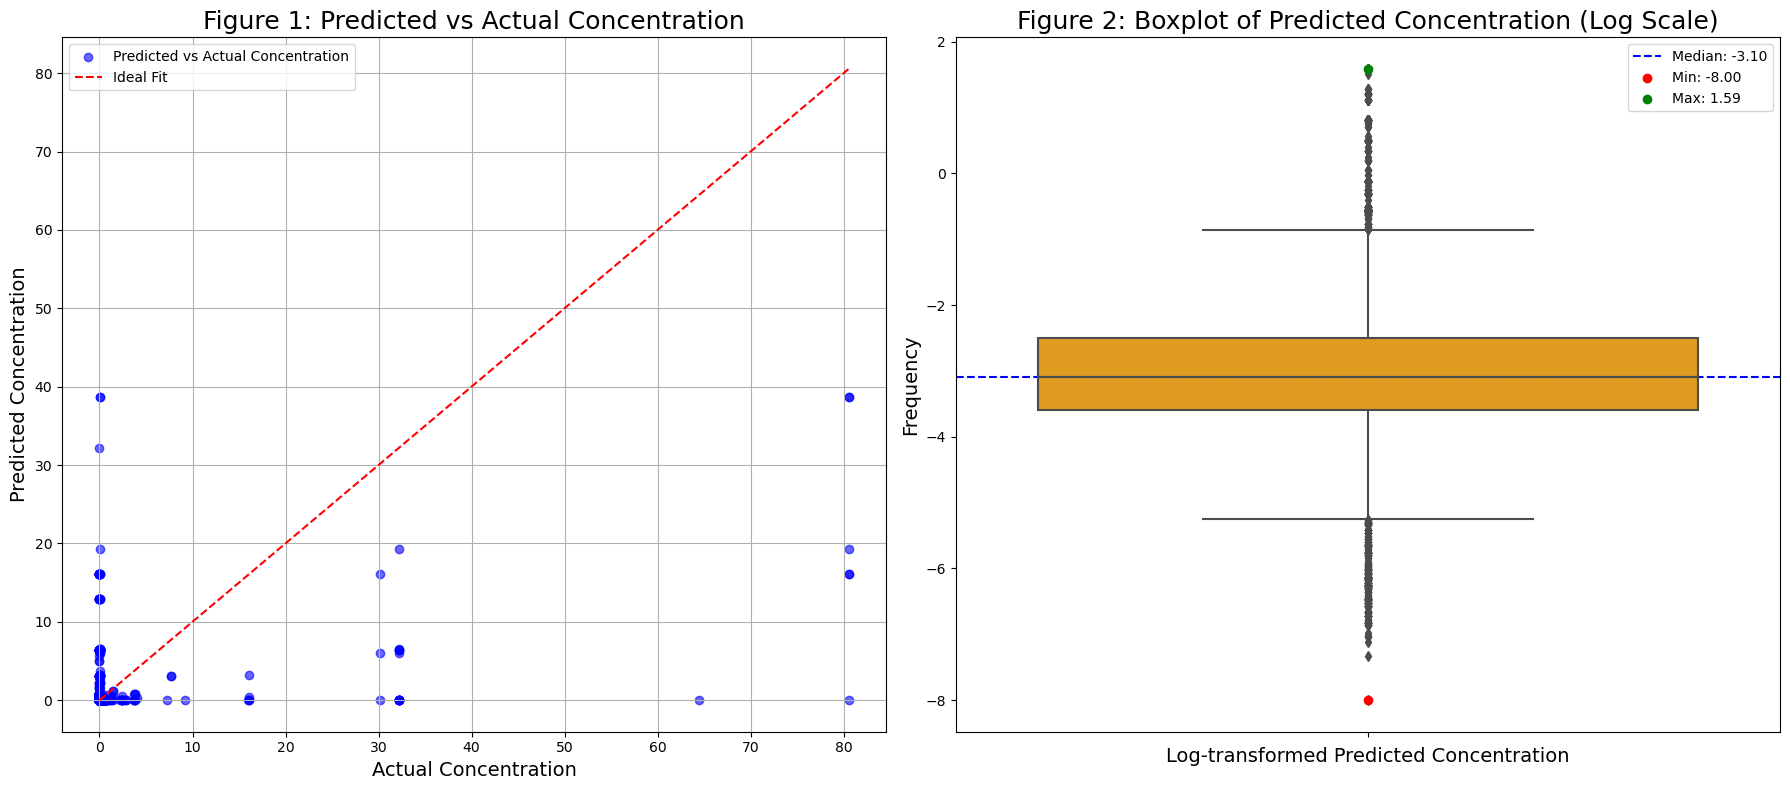

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# --- Figure 1: Scatter plot, Predicted vs Actual Concentration ---

axs[0].scatter(y_test['Concentration'], y_pred[:, 0], alpha=0.6, color='blue', label='Predicted vs Actual Concentration')
axs[0].plot([min(y_test['Concentration']), max(y_test['Concentration'])], 
            [min(y_test['Concentration']), max(y_test['Concentration'])], 
            color='red', linestyle='--', label='Ideal Fit')

axs[0].set_title("Figure 1: Predicted vs Actual Concentration", fontsize=18)
axs[0].set_xlabel("Actual Concentration", fontsize=14)
axs[0].set_ylabel("Predicted Concentration", fontsize=14)
axs[0].legend()
axs[0].grid()


# --- Figure 2: Boxplot of Log-transformed Predicted Concentration ---

# Shift the values and apply log transformation to predicted concentration
shifted_concentration = y_pred[:, 0] - np.min(y_pred[:, 0]) + 1e-8
log_predicted_concentration = np.log10(shifted_concentration)

sns.boxplot(y=log_predicted_concentration, color='orange', ax=axs[1])

median_value = np.median(log_predicted_concentration)
axs[1].axhline(median_value, color='blue', linestyle='--', label=f'Median: {median_value:.2f}')
min_value = np.min(log_predicted_concentration)
max_value = np.max(log_predicted_concentration)
axs[1].scatter([0], [min_value], color='red', zorder=5, label=f'Min: {min_value:.2f}')
axs[1].scatter([0], [max_value], color='green', zorder=5, label=f'Max: {max_value:.2f}')
axs[1].set_title("Figure 2: Boxplot of Predicted Concentration (Log Scale)", fontsize=18)
axs[1].set_xlabel("Log-transformed Predicted Concentration", fontsize=14)
axs[1].set_ylabel("Frequency", fontsize=14)
axs[1].legend(loc="upper right")

plt.tight_layout()
plt.show()


### Analysis of Predicted vs. Actual Concentration:

**Figure 1:**

From the scattere plot we can see there is a weak corelation btween the predicted values and the actual values (correlation coefficient = `0.38`).It can be seen that many predictions diverge from the `ideal fit` (represented by the red dotted line), prominantly at the higher concentration levels. There are many prominant outliers and the grpah is very scattered so this clearly indicats that the model is not working well for the Concentration.

**Figure 2:**

From the boxplot we can see the **median predicted concentration** to be around **-3**, so half of the predictions fall below this value. While the boxplot ranges from **-4 and -2** so most of the predictions are clustered between these values, that means the model frequently predicts **low concentrations** in this range. 
The **minimum value** is **-8** indicating outliers while the **maximum value** is **1.59** this shows that the rearely model predicts higher concentrations. 
The **whiskers** range from **-2** to **-5** showing the majority of the higher values and not predicted correctly and are underpredicted while the model is more leaning towards predicting the lower concentrations.

1. Visualize Predictions for Drug and Concentration
Visualize Predictions vs. Actual Values for Drug

Visualize Predictions vs. Actual Values for Concentration

**MultiOutput KNN model of Pharmasuticals Data of 2016**

/tmp/ipykernel_327/1453418351.py:12: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2016.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.031499061769693186
R² Score: 0.14356985277355994

Classification Metrics for Drug:
Accuracy: 0.9938071780436313
F1 Score: 0.9968939714810109
Recall: 0.9999797685522376

Confusion Matrix:
[[    0   307]
 [    1 49427]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
88852           5.219005e-07                 0.000113            4   
170870          8.054020e-05                 0.000202          185   
224711          2.013505e-05                 0.000113          171   
66285           2.965910e-04                 0.009779          235   
223412          2.416206e-04                 0.000339          248   

        Predicted_Drug Predicted_Drug_Name Actual_Drug_Name  
88852             84.4   DEXTROAMPHETAMINE        ALBUTEROL  
170870           180.4         LINACLOTIDE       LORATADINE  
224711           116.4          FENOPROFEN        LETROZOLE  
662

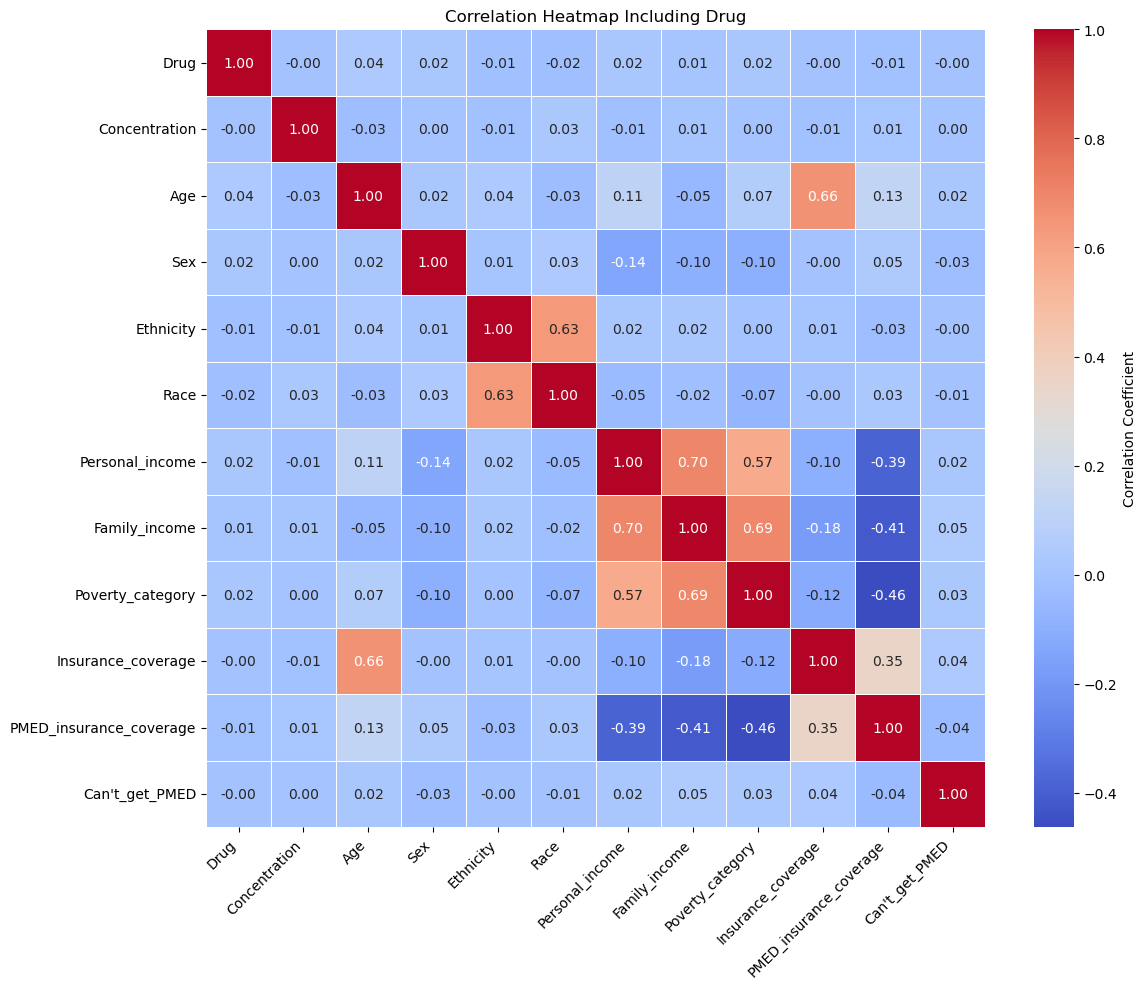

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2016.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Race', 'Personal_income', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_get_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_get_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_scaled)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2016.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**MultiOutput KNN-PCA model of Pharmasuticals Data of 2018**

/tmp/ipykernel_327/929319801.py:13: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2018.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.4215067699020273
R² Score: 0.2178346722887352

Classification Metrics for Drug:
Accuracy: 0.9935188112551375
F1 Score: 0.9967486637801145
Recall: 1.0

Confusion Matrix:
[[    2   205]
 [    0 31423]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
131415              0.000016                 0.003899          227   
125377              0.005234                 0.003250          135   
54331               0.000322                 0.002502          184   
110912              0.000161                 0.000375          134   
44975               0.000805                 0.001440          188   

        Predicted_Drug  Predicted_Drug_Name Actual_Drug_Name  
131415         162.625         KETOCONAZOLE    NITROGLYCERIN  
125377         213.375           MOMETASONE       GABAPENTIN  
54331          143.625  HYDROCHLOROTHIAZIDE       LISINOPRIL  
110912         17

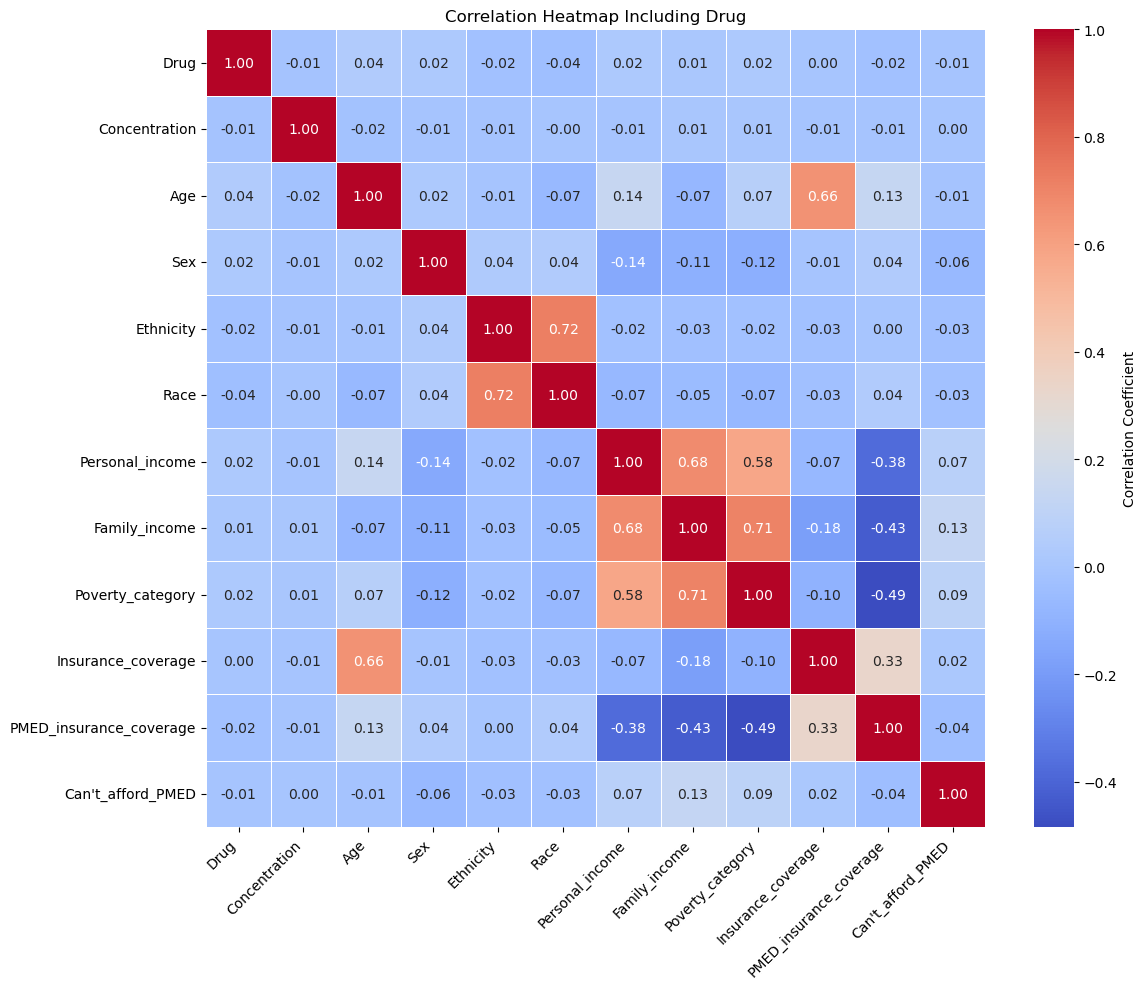

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2018.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Race', 'Personal_income', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_afford_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_afford_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=8)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_pca, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_pca)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2018.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Test by reducing the Feature Set**

/tmp/ipykernel_327/2691497001.py:13: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2018.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.4676301485349881
R² Score: 0.13224623067963392

Classification Metrics for Drug:
Accuracy: 0.9935188112551375
F1 Score: 0.9967486637801145
Recall: 1.0

Confusion Matrix:
[[    2   205]
 [    0 31423]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
131415              0.000016                 0.000420          227   
125377              0.005234                 0.000424          135   
54331               0.000322                 0.002270          184   
110912              0.000161                 0.000015          134   
44975               0.000805                 0.005056          188   

        Predicted_Drug  Predicted_Drug_Name Actual_Drug_Name  
131415         100.250             DOCUSATE    NITROGLYCERIN  
125377         143.750  HYDROCHLOROTHIAZIDE       GABAPENTIN  
54331          163.125         KETOCONAZOLE       LISINOPRIL  
110912         2

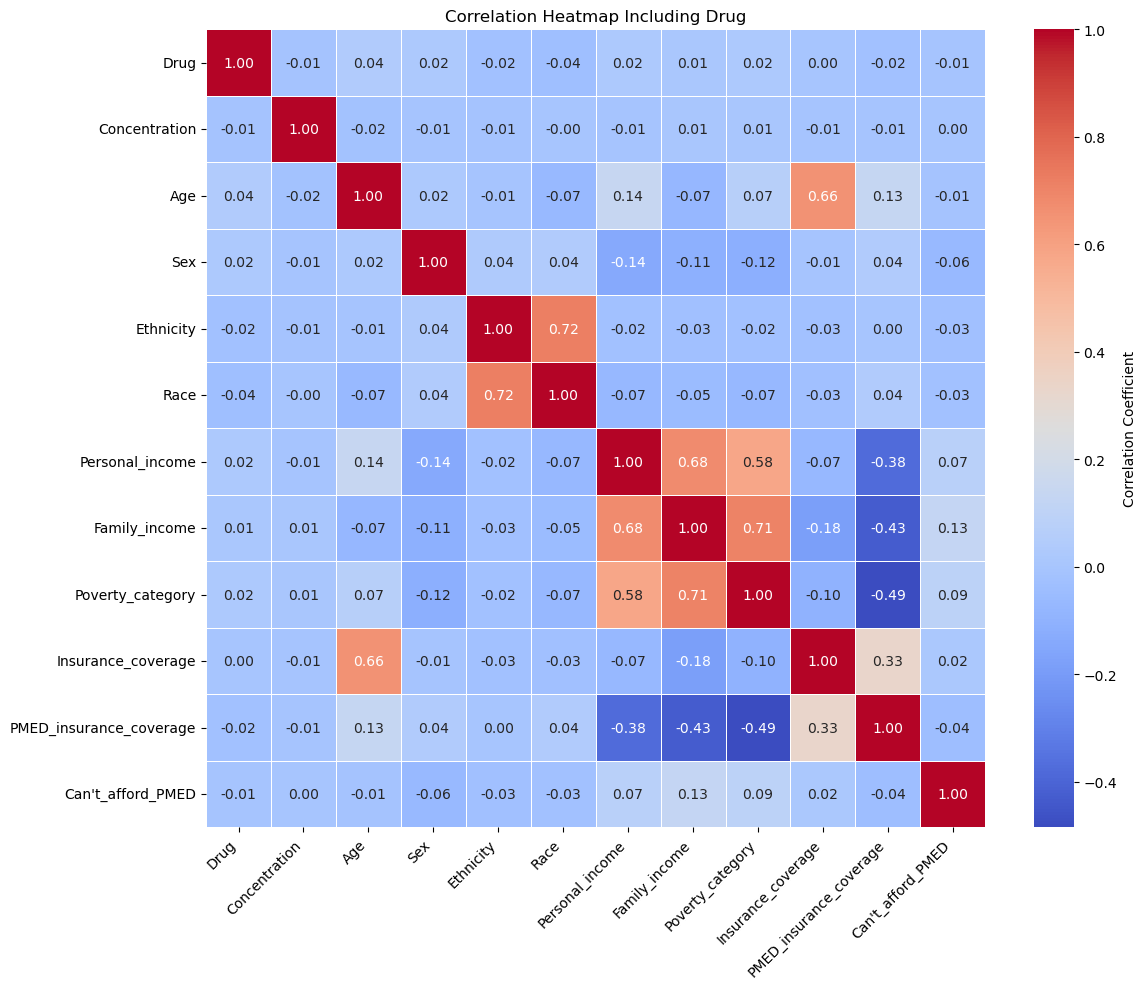

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2018.csv")

# Define features (X) and target variables (y)
X = df[['Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_afford_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_afford_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=8)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_pca, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_pca)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2018.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Analysis:
    
Reducing the similar feature sets the **R²** value increased, which improved the model's efficiency in predicting concentration. However, there was no noticeable change in the accuracy of drug classification, indicating that the drug predictions remained stable despite adjustments to the features.

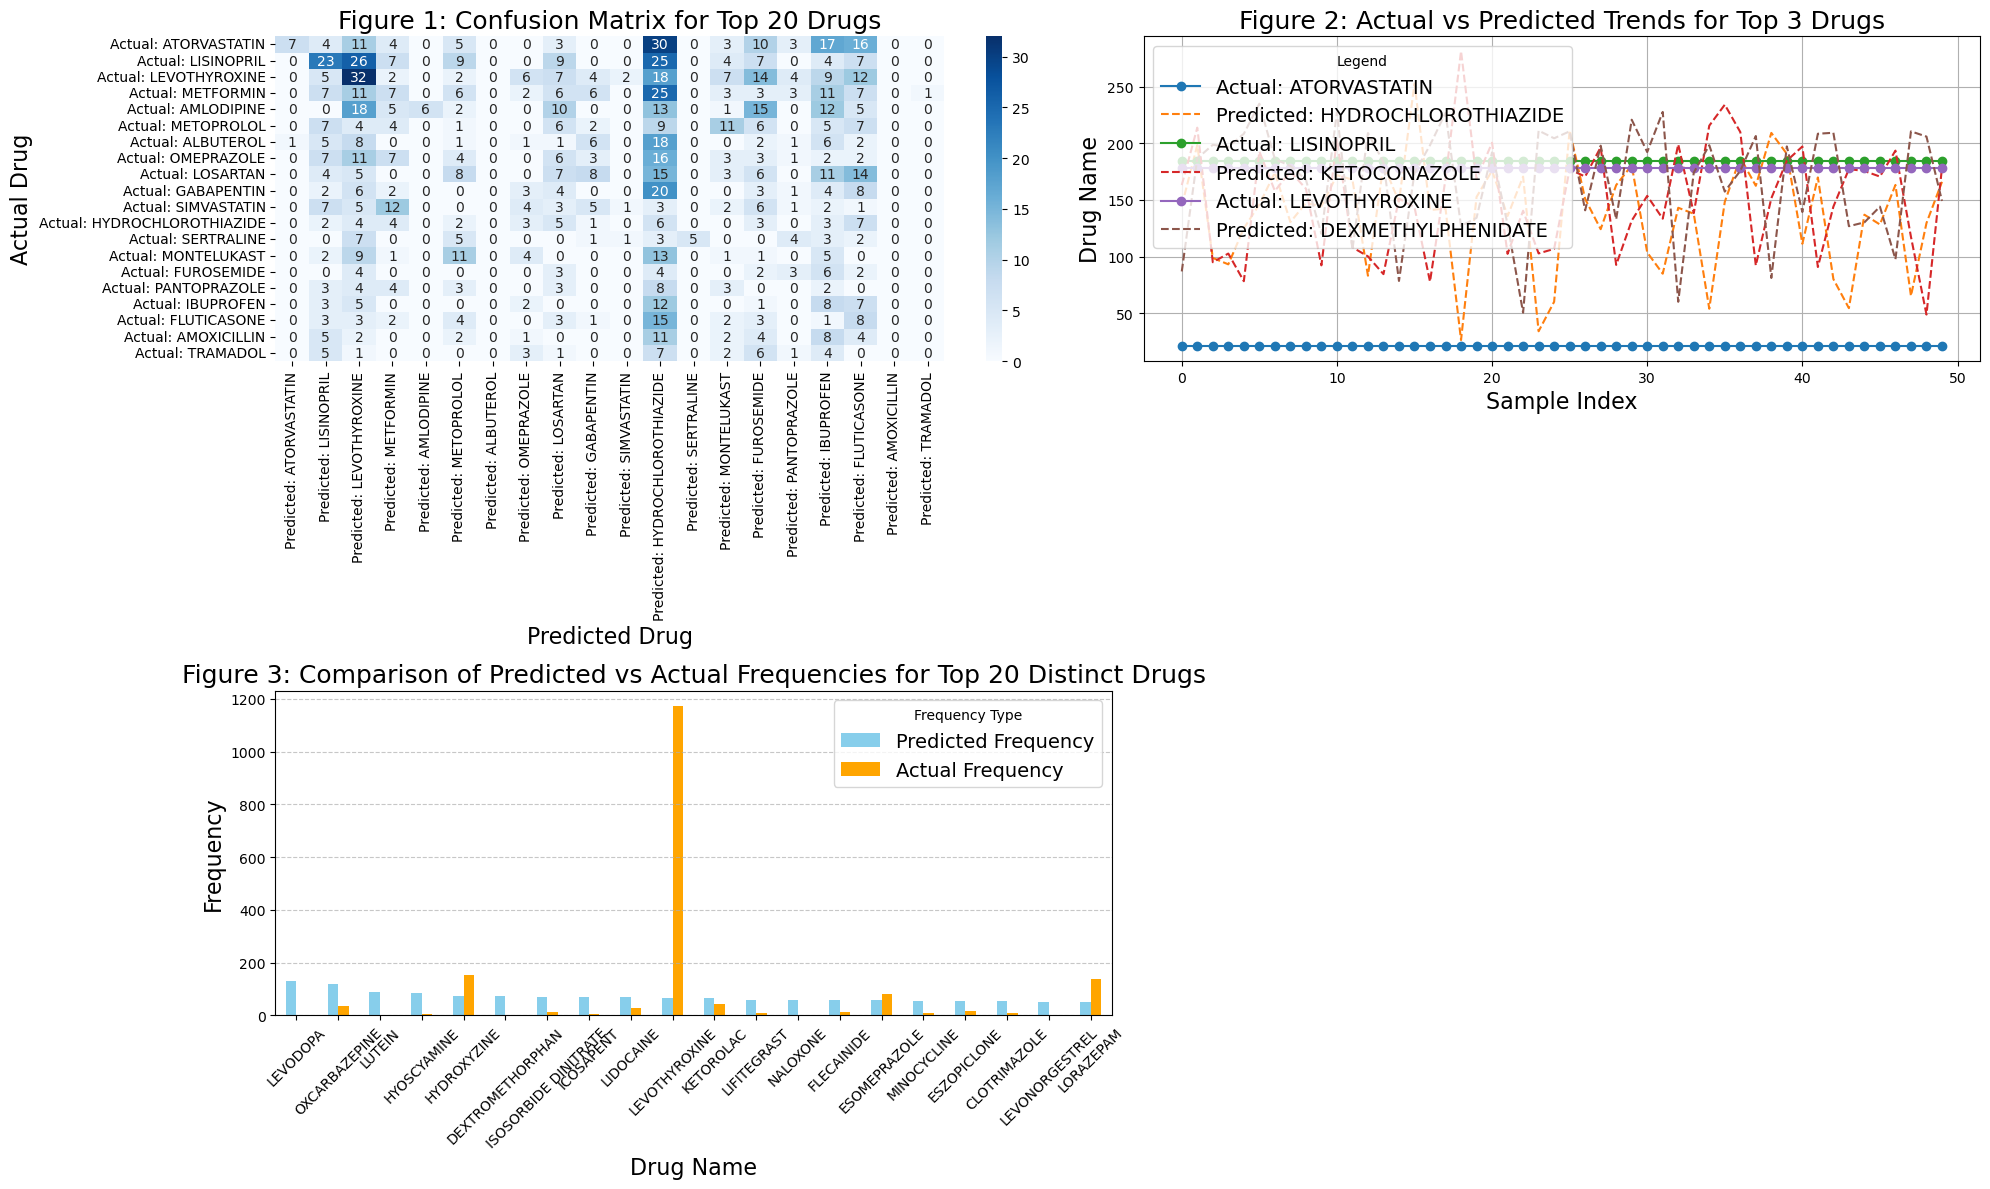

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Assuming `df_cleaned`, `y_test`, `y_pred`, and `encoder` are already defined.

# Create a 2x2 grid for the plots, but only use 3 spaces with larger figsize
fig, axes = plt.subplots(2, 2, figsize=(24, 18))  # Increased the figsize to make all plots larger

top_n = 20  # You can change this to 10, 5, or any other number as required
top_drugs = df_cleaned['Drug'].value_counts().nlargest(top_n).index

# ---- Figure 1: Confusion Matrix for Top Drugs ----
filtered_y_test = y_test[y_test['Drug'].isin(top_drugs)]['Drug']
filtered_y_pred = y_pred[:, 1][np.isin(y_test['Drug'], top_drugs)].round()
conf_matrix = confusion_matrix(filtered_y_test, filtered_y_pred, labels=top_drugs)

sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[f"Predicted: {encoder.inverse_transform([int(label)])[0]}" for label in top_drugs],
    yticklabels=[f"Actual: {encoder.inverse_transform([int(label)])[0]}" for label in top_drugs],
    ax=axes[0, 0]
)
axes[0, 0].set_title(f"Figure 1: Confusion Matrix for Top {top_n} Drugs", fontsize=18)
axes[0, 0].set_xlabel("Predicted Drug", fontsize=16)
axes[0, 0].set_ylabel("Actual Drug", fontsize=16)

# ---- Figure 2: Actual vs Predicted Trends for Top Drugs ----
for drug in top_drugs[:3]:  # Limiting to the top 5 for this graph
    actual_indices = y_test['Drug'] == drug
    actual = y_test.loc[actual_indices, 'Drug'].head(50).values
    predicted = y_pred[actual_indices, 1][:50]
    if len(actual) > 0:
        axes[0, 1].plot(
            range(len(actual)),
            actual,
            label=f"Actual: {encoder.inverse_transform([drug])[0]}",
            marker='o'
        )
        axes[0, 1].plot(
            range(len(predicted)),
            predicted,
            label=f"Predicted: {encoder.inverse_transform([int(predicted[0])])[0]}",
            linestyle='--'
        )
axes[0, 1].set_title(f"Figure 2: Actual vs Predicted Trends for Top 3 Drugs", fontsize=18)
axes[0, 1].set_xlabel("Sample Index", fontsize=16)
axes[0, 1].set_ylabel("Drug Name", fontsize=16)
axes[0, 1].legend(title="Legend", fontsize=14)
axes[0, 1].grid()

# ---- Figure 3: Bar Plot for Top Drugs ----
top_predicted_drugs = pd.Series(y_pred[:, 1]).value_counts().sort_values(ascending=False)
top_actual_frequencies = y_test['Drug'].value_counts()
common_drugs = top_predicted_drugs.index.intersection(top_actual_frequencies.index)

distinct_predicted_drugs = top_predicted_drugs.loc[common_drugs].head(top_n)
distinct_actual_frequencies = top_actual_frequencies.loc[common_drugs].head(top_n)

# Decode drug names using the LabelEncoder
decoded_drug_names = encoder.inverse_transform(distinct_predicted_drugs.index.astype(int))

# Create a comparison DataFrame for distinct drugs
comparison_df = pd.DataFrame({
    'Drug': decoded_drug_names,  # Use drug names for better readability
    'Predicted Frequency': distinct_predicted_drugs.values,
    'Actual Frequency': distinct_actual_frequencies.values
})

# Plot the comparison bar chart with a larger size
comparison_df.set_index('Drug').plot(kind='bar', figsize=(20, 12), rot=45, color=['skyblue', 'orange'], ax=axes[1, 0])
axes[1, 0].set_title(f"Figure 3: Comparison of Predicted vs Actual Frequencies for Top {top_n} Distinct Drugs", fontsize=18)
axes[1, 0].set_xlabel("Drug Name", fontsize=16)
axes[1, 0].set_ylabel("Frequency", fontsize=16)
axes[1, 0].legend(title="Frequency Type", loc='upper right', fontsize=14)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Remove the extra plot (bottom-right corner) to leave only 3 plots
fig.delaxes(axes[1, 1])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


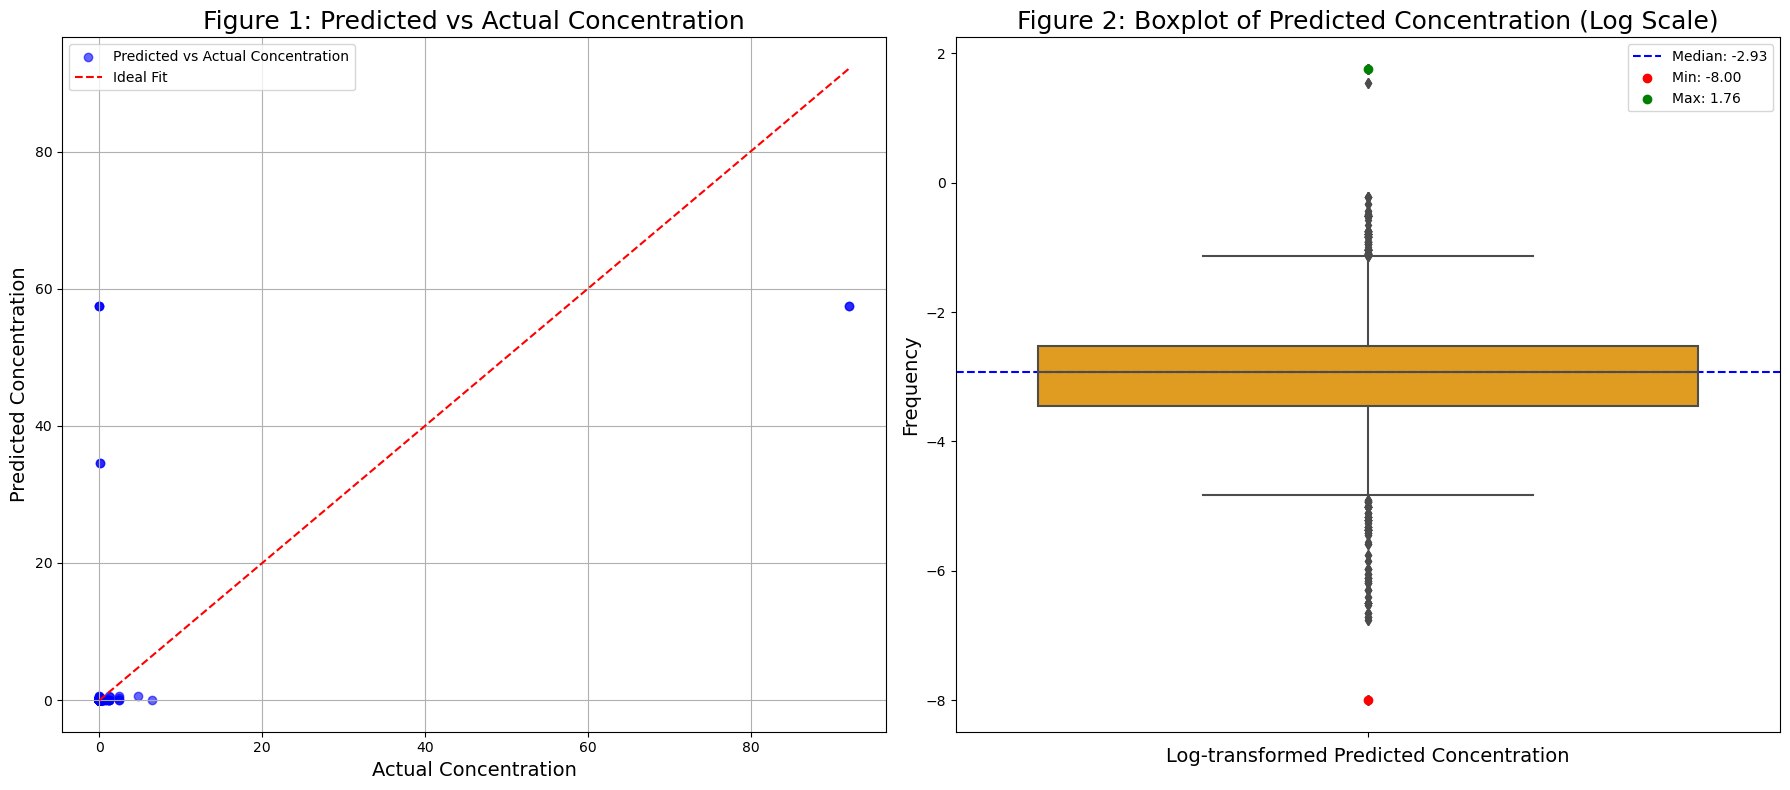

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# --- Figure 1: Scatter plot, Predicted vs Actual Concentration ---

axs[0].scatter(y_test['Concentration'], y_pred[:, 0], alpha=0.6, color='blue', label='Predicted vs Actual Concentration')
axs[0].plot([min(y_test['Concentration']), max(y_test['Concentration'])], 
            [min(y_test['Concentration']), max(y_test['Concentration'])], 
            color='red', linestyle='--', label='Ideal Fit')

axs[0].set_title("Figure 1: Predicted vs Actual Concentration", fontsize=18)
axs[0].set_xlabel("Actual Concentration", fontsize=14)
axs[0].set_ylabel("Predicted Concentration", fontsize=14)
axs[0].legend()
axs[0].grid()


# --- Figure 2: Boxplot of Log-transformed Predicted Concentration ---

# Shift the values and apply log transformation to predicted concentration
shifted_concentration = y_pred[:, 0] - np.min(y_pred[:, 0]) + 1e-8
log_predicted_concentration = np.log10(shifted_concentration)

sns.boxplot(y=log_predicted_concentration, color='orange', ax=axs[1])

median_value = np.median(log_predicted_concentration)
axs[1].axhline(median_value, color='blue', linestyle='--', label=f'Median: {median_value:.2f}')
min_value = np.min(log_predicted_concentration)
max_value = np.max(log_predicted_concentration)
axs[1].scatter([0], [min_value], color='red', zorder=5, label=f'Min: {min_value:.2f}')
axs[1].scatter([0], [max_value], color='green', zorder=5, label=f'Max: {max_value:.2f}')
axs[1].set_title("Figure 2: Boxplot of Predicted Concentration (Log Scale)", fontsize=18)
axs[1].set_xlabel("Log-transformed Predicted Concentration", fontsize=14)
axs[1].set_ylabel("Frequency", fontsize=14)
axs[1].legend(loc="upper right")

plt.tight_layout()
plt.show()


**Analysis:**

For the **2018** data, the trends were similar to what we saw in **2014**. The drug predictions were mostly accurate, with solid performance in identifying commonly used medications. However, when it came to predicting concentrations, the results weren’t as strong. There was a weak correlation between predicted and actual values, especially at higher concentrations, where the predictions often missed the mark. The model seems to rely more on demographic factors for concentration predictions, but there’s definitely room for improvement, especially in making those concentration predictions more reliable.

**MultiOutput KNN-PCA Model for Pharmaceutical Data of 2020**

/tmp/ipykernel_327/2239775387.py:13: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2020.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.005299623424217472
R² Score: 0.029500401017701683

Classification Metrics for Drug:
Accuracy: 0.9964254617111956
F1 Score: 0.998209530805252
Recall: 1.0

Confusion Matrix:
[[    0   156]
 [    0 43486]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
44725               0.000040                 0.000086          173   
187359              0.000003                 0.000178          213   
179514              0.000488                 0.001886           19   
179371              0.000201                 0.001072           19   
112089              0.000322                 0.000185          139   

        Predicted_Drug Predicted_Drug_Name Actual_Drug_Name  
44725          190.625     METHYLPHENIDATE       LISINOPRIL  
187359         159.875         LATANOPROST    NITROGLYCERIN  
179514         247.750     PSEUDOEPHEDRINE         ATENOLOL  
179371         139

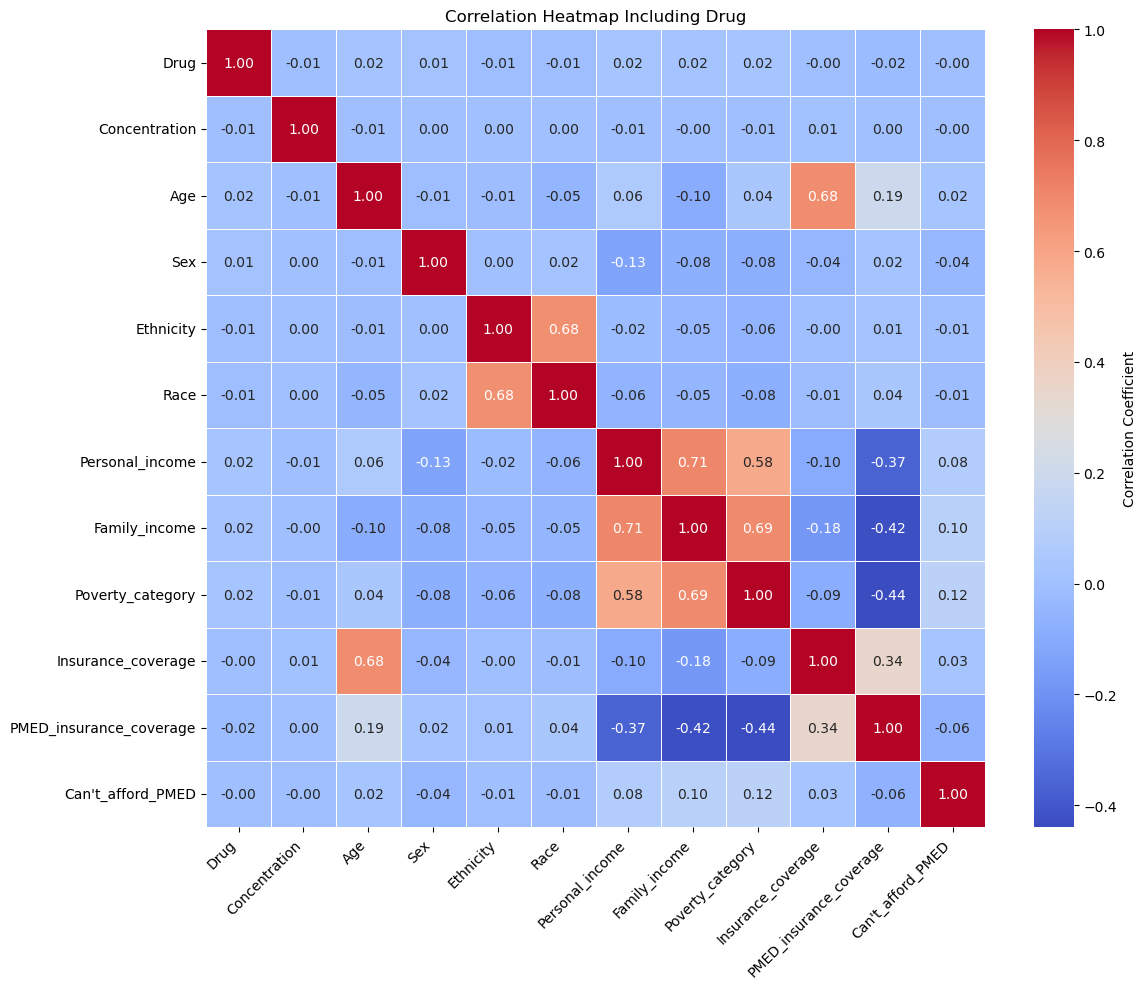

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2020.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Race', 'Personal_income', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_afford_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_afford_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=8)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_pca, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_pca)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2020.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Reducing the features

/tmp/ipykernel_327/3564563746.py:13: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2020.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.005387859647816568
R² Score: 0.013342041684598738

Classification Metrics for Drug:
Accuracy: 0.9964254617111956
F1 Score: 0.998209530805252
Recall: 1.0

Confusion Matrix:
[[    0   156]
 [    0 43486]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
44725               0.000040                 0.000116          173   
187359              0.000003                 0.000340          213   
179514              0.000488                 0.005258           19   
179371              0.000201                 0.002099           19   
112089              0.000322                 0.000186          139   

        Predicted_Drug Predicted_Drug_Name Actual_Drug_Name  
44725          202.375            MORPHINE       LISINOPRIL  
187359         189.000       METHOCARBAMOL    NITROGLYCERIN  
179514         168.625           LIDOCAINE         ATENOLOL  
179371         184

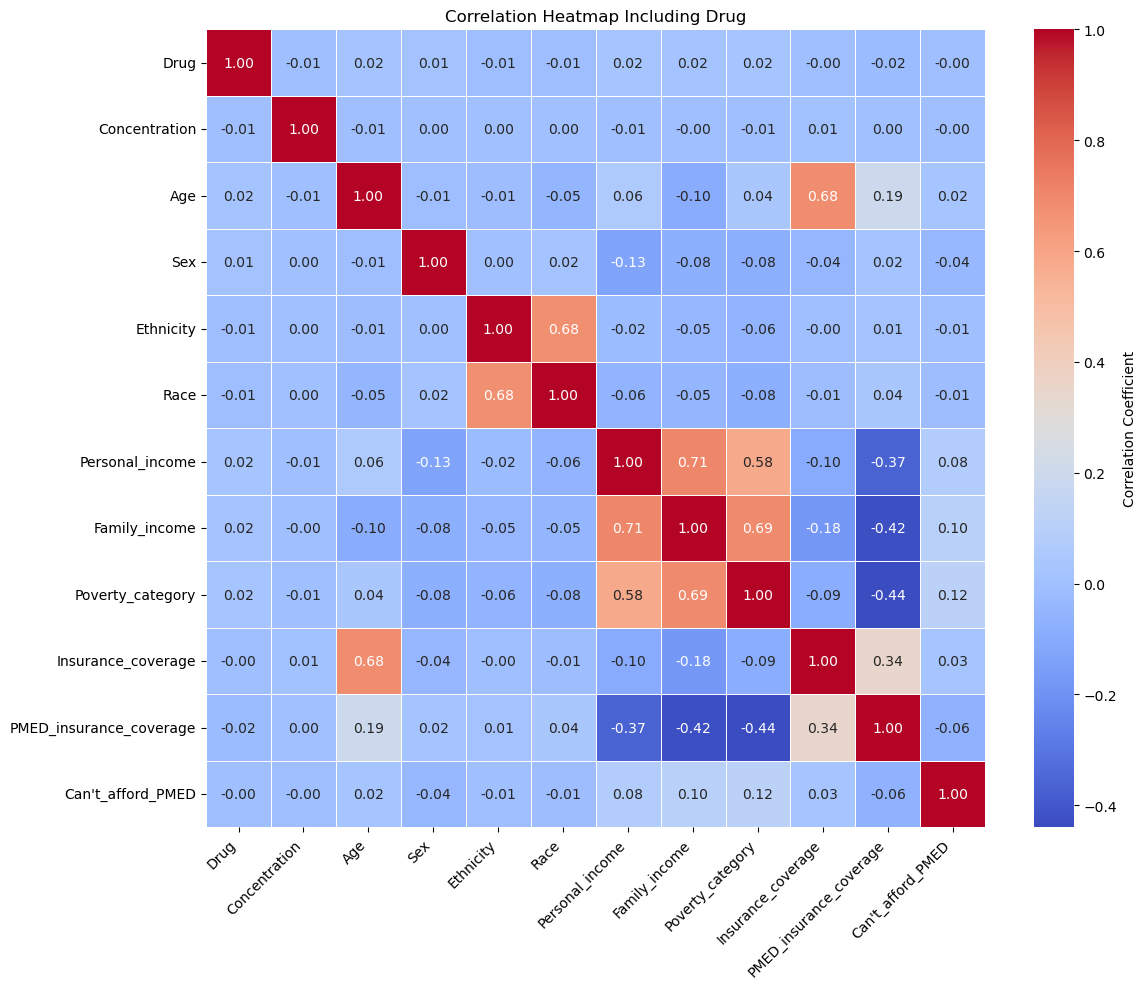

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2020.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Personal_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_afford_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_afford_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=8)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_pca, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_pca)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2020.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**MultiOutput KNN-PCA Model for Pharmaceutical Data of 2021**

/tmp/ipykernel_327/1319645556.py:13: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2021.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.028549544405492736
R² Score: 0.07971858888233985

Classification Metrics for Drug:
Accuracy: 0.9958830614255995
F1 Score: 0.9979372846766584
Recall: 1.0

Confusion Matrix:
[[    0   188]
 [    0 45477]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
58514               0.000040                 0.000121           19   
134578              0.000805                 0.004550          151   
87135               0.000004                 0.000298          242   
142646              0.000081                 0.000335           82   
228053              0.000322                 0.003268          128   

        Predicted_Drug Predicted_Drug_Name Actual_Drug_Name  
58514        97.666667        FLURBIPROFEN     ATORVASTATIN  
134578      138.444444           LETROZOLE         LOSARTAN  
87135       137.666667           LETROZOLE       TAMSULOSIN  
142646       95.77

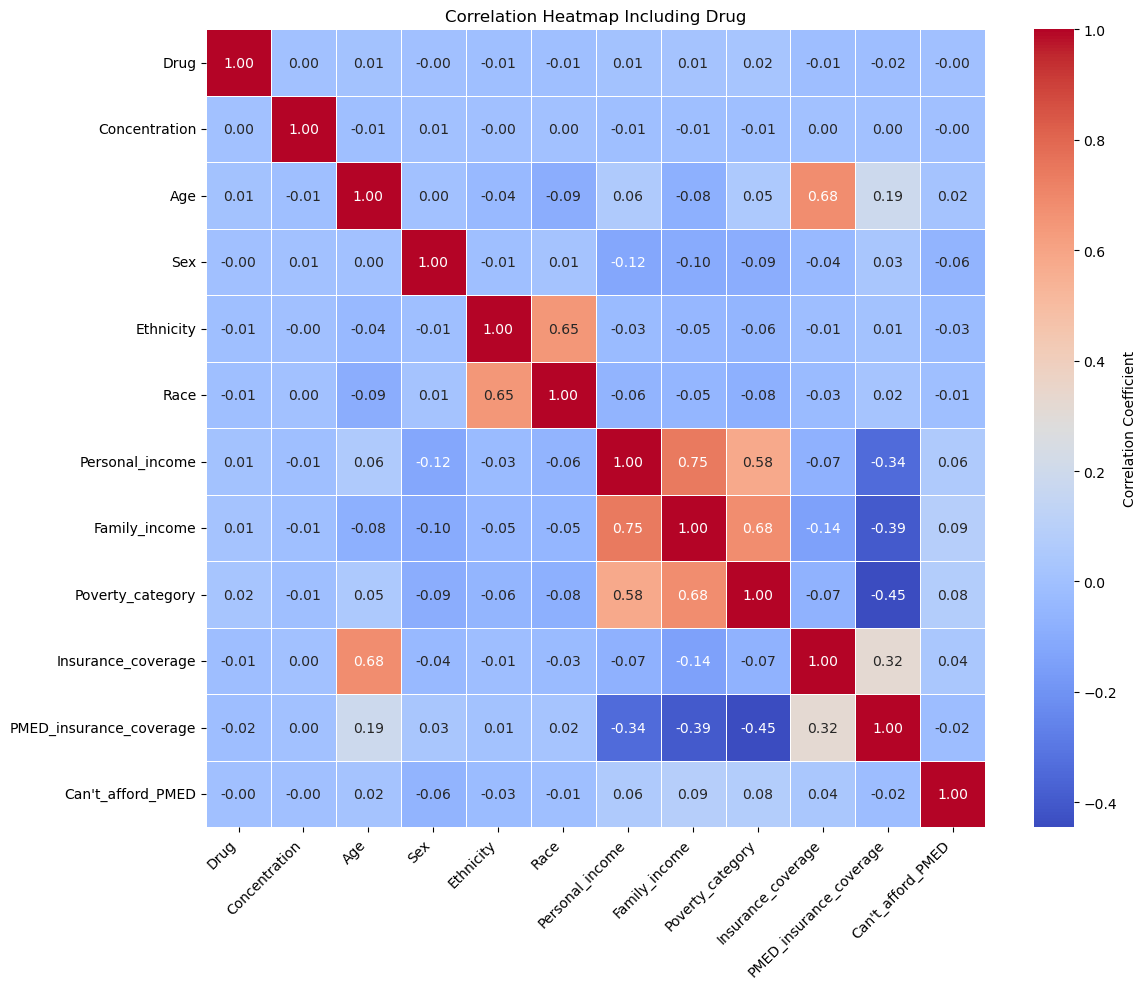

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2021.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Race', 'Personal_income', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_afford_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_afford_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=9)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_pca, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_pca)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2021.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Reducing features

/tmp/ipykernel_327/839530376.py:13: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2021.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.028534767268932372
R² Score: 0.08019492307152687

Classification Metrics for Drug:
Accuracy: 0.9958830614255995
F1 Score: 0.9979372846766584
Recall: 1.0

Confusion Matrix:
[[    0   188]
 [    0 45477]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
58514               0.000040                 0.000121           19   
134578              0.000805                 0.001635          151   
87135               0.000004                 0.000388          242   
142646              0.000081                 0.000214           82   
228053              0.000322                 0.003013          128   

        Predicted_Drug  Predicted_Drug_Name Actual_Drug_Name  
58514        97.666667         FLURBIPROFEN     ATORVASTATIN  
134578      155.444444  MEDROXYPROGESTERONE         LOSARTAN  
87135        96.555556           FLUOXETINE       TAMSULOSIN  
142646      12

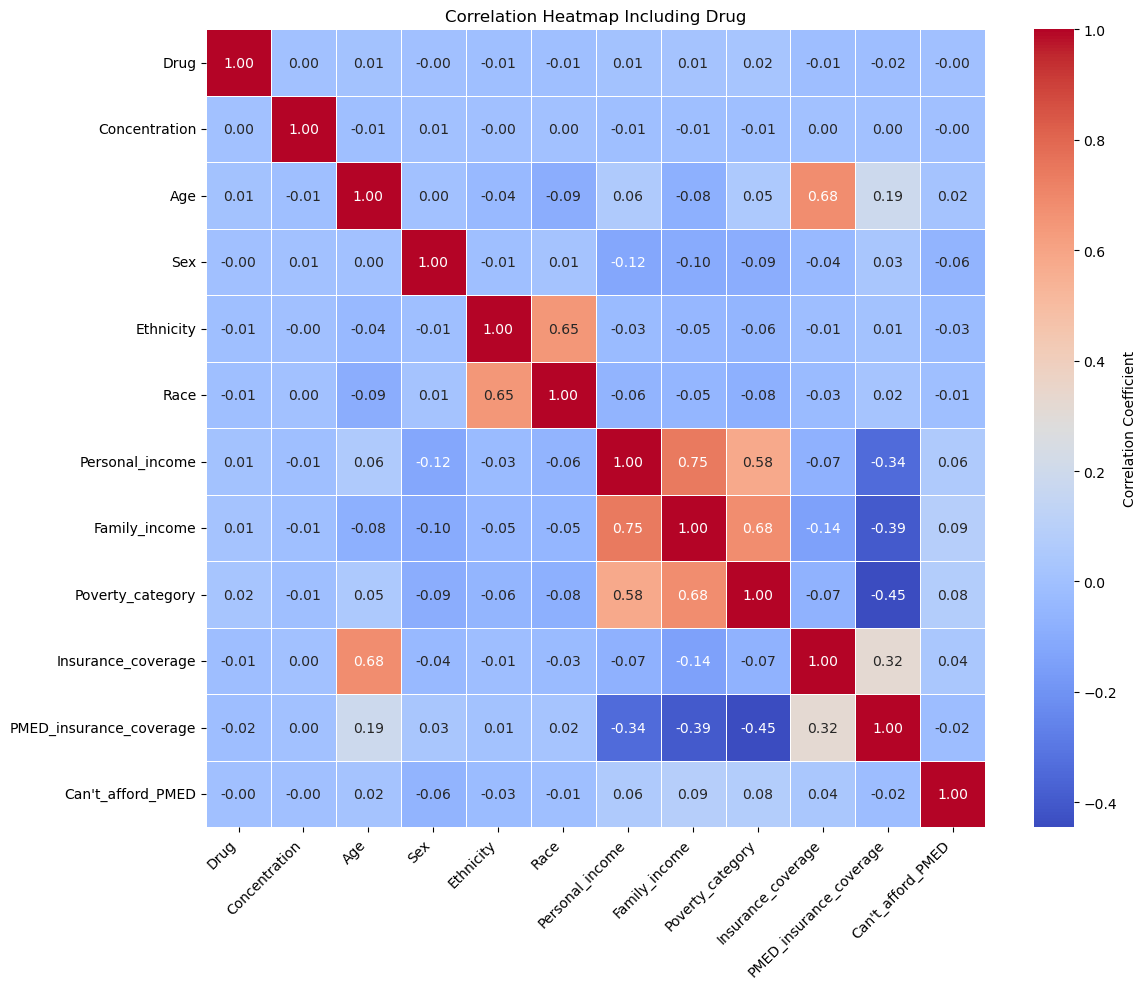

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2021.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Race', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_afford_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_afford_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=9)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_pca, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_pca)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("comparison_results_2021.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**MultiOutput KNN-PCA Model for Pharmaceutical Data of 2022**

/tmp/ipykernel_327/4257292858.py:13: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2022.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.01934040321086138
R² Score: 0.05110170114640267

Classification Metrics for Drug:
Accuracy: 0.9959892282129147
F1 Score: 0.9979905844528649
Recall: 1.0

Confusion Matrix:
[[    0   140]
 [    0 34766]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
71552               0.000161                 0.000251          188   
92553               0.000052                 0.000351            9   
92394               0.000081                 0.002341            9   
140919              0.001208                 0.000488          185   
27252               0.000322                 0.000246          213   

        Predicted_Drug Predicted_Drug_Name Actual_Drug_Name  
71552       163.111111          MIRABEGRON        OXYCODONE  
92553       118.777778           IBUPROFEN       AMLODIPINE  
92394       110.333333          GUANFACINE       AMLODIPINE  
140919      139.777

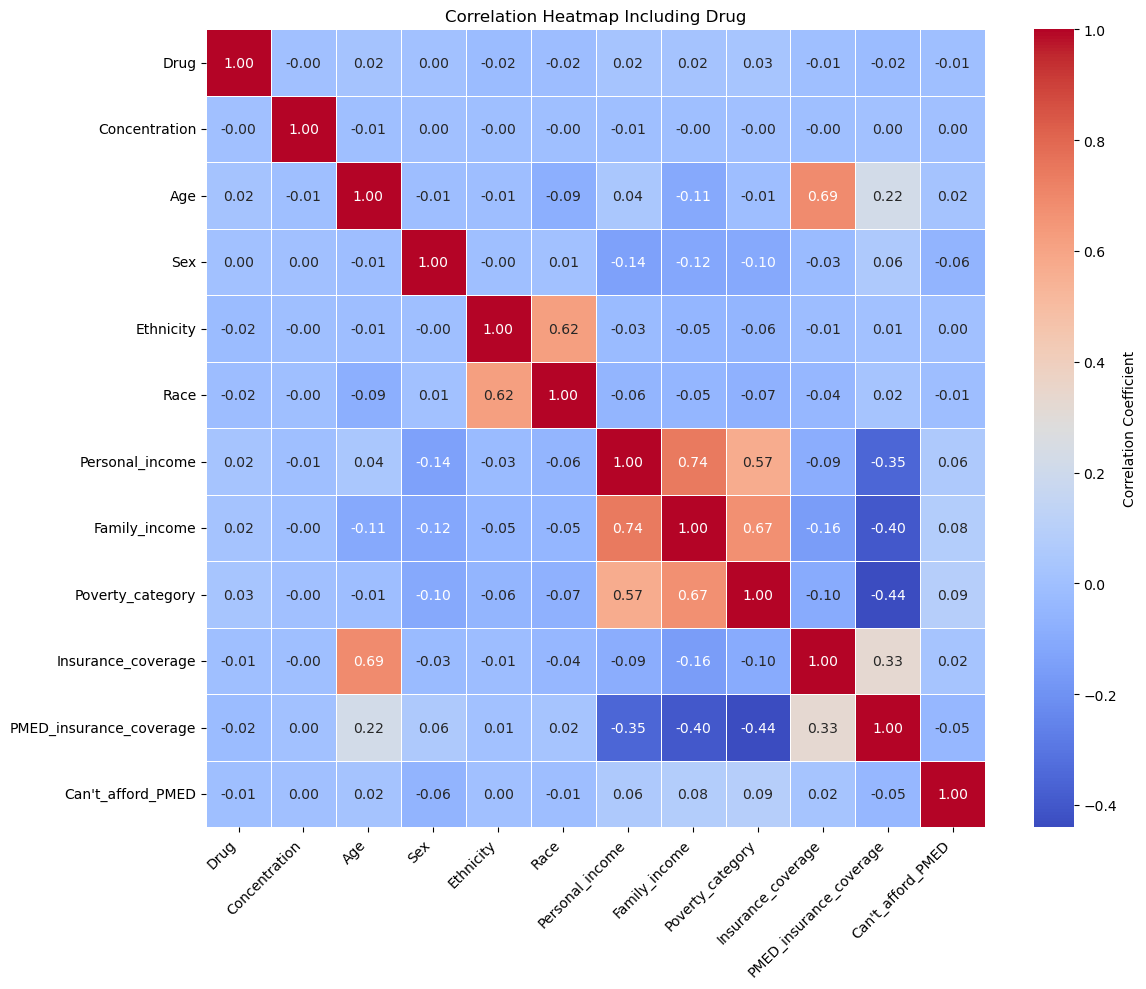

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2022.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Race', 'Personal_income', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_afford_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_afford_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=9)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_pca, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_pca)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("data/comparison_results_2022.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_327/479885145.py:13: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meps_clean_2022.csv")



Regression Metrics for Concentration:
Mean Squared Error (MSE): 0.01732070310478464
R² Score: 0.1501942574884736

Classification Metrics for Drug:
Accuracy: 0.9959892282129147
F1 Score: 0.9979905844528649
Recall: 1.0

Confusion Matrix:
[[    0   140]
 [    0 34766]]

Comparison of Actual vs Predicted Values:
        Actual_Concentration  Predicted_Concentration  Actual_Drug  \
71552               0.000161                 0.000251          188   
92553               0.000052                 0.007458            9   
92394               0.000081                 0.002882            9   
140919              0.001208                 0.029822          185   
27252               0.000322                 0.000284          213   

        Predicted_Drug Predicted_Drug_Name Actual_Drug_Name  
71552       163.111111          MIRABEGRON        OXYCODONE  
92553       153.000000           MEMANTINE       AMLODIPINE  
92394       102.000000         FLUTICASONE       AMLODIPINE  
140919       80.1111

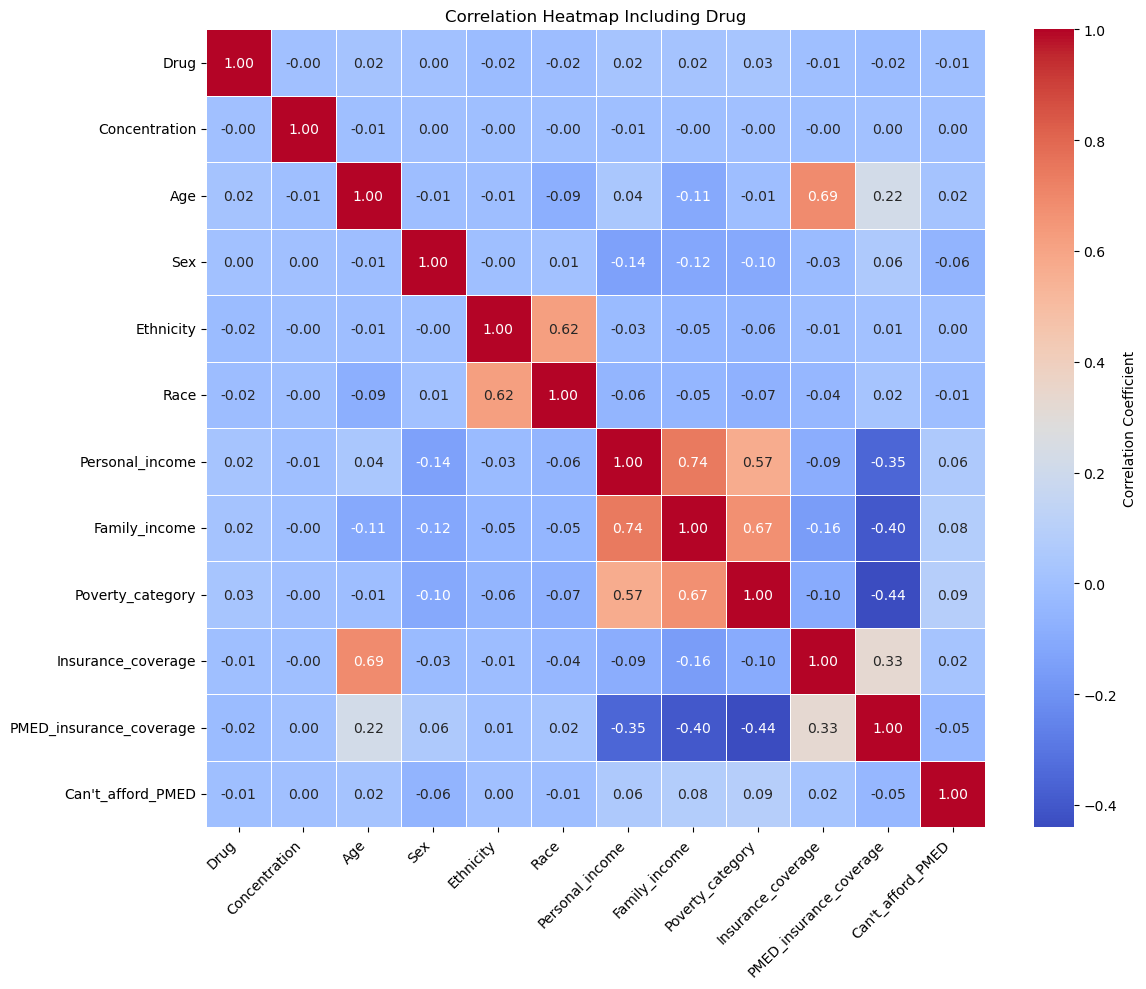

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("data/meps_clean_2022.csv")

# Define features (X) and target variables (y)
X = df[['Age', 'Sex', 'Ethnicity', 'Family_income',
        'Poverty_category', 'Insurance_coverage', 'PMED_insurance_coverage', 'Can\'t_afford_PMED']]
y = df[['Concentration', 'Drug']]

feature_set = ['Drug', 'Concentration', 'Age', 'Sex', 'Ethnicity',
               'Race', 'Personal_income', 'Family_income',
               'Poverty_category', 'Insurance_coverage',
               'PMED_insurance_coverage', 'Can\'t_afford_PMED']

# Drop rows with missing values in any of the features or target variables
df_cleaned = df.dropna(subset=feature_set)

# Handle categorical columns in X (features) and convert them to numeric using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values in target variables y (Concentration and Drug)
encoder = LabelEncoder()
y['Drug'] = encoder.fit_transform(y['Drug'])

# Replace infinite values with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert Concentration to numeric values and handle any NaN values
y['Concentration'] = pd.to_numeric(y['Concentration'], errors='coerce')

# Ensure there are no missing values in features or targets after conversion
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=9)
multi_output_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_output_knn.fit(X_train_pca, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test_pca)

# Evaluate Concentration (regression)
mse = mean_squared_error(y_test['Concentration'], y_pred[:, 0])
r2 = r2_score(y_test['Concentration'], y_pred[:, 0])

# Print metrics for Concentration
print("\nRegression Metrics for Concentration:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Evaluate Drug (classification)
threshold = 0.5
y_test_binarized = (y_test['Drug'] >= threshold).astype(int)
y_pred_binarized = (y_pred[:, 1] >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binarized, y_pred_binarized)
accuracy = accuracy_score(y_test_binarized, y_pred_binarized)
f1 = f1_score(y_test_binarized, y_pred_binarized)
recall = recall_score(y_test_binarized, y_pred_binarized)

# Print metrics for Drug
print("\nClassification Metrics for Drug:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual_Concentration': y_test['Concentration'],
    'Predicted_Concentration': y_pred[:, 0],
    'Actual_Drug': y_test['Drug'],
    'Predicted_Drug': y_pred[:, 1]
})

# Add inverse-transformed Drug names
comparison_df['Predicted_Drug_Name'] = encoder.inverse_transform(comparison_df['Predicted_Drug'].round().astype(int))
comparison_df['Actual_Drug_Name'] = encoder.inverse_transform(comparison_df['Actual_Drug'].round().astype(int))

# Save results to CSV
comparison_df.to_csv("comparison_results_2022.csv", index=False)

# Display comparison table
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Ensure 'Drug' is numeric and included in the cleaned dataset
df_cleaned['Drug'] = encoder.transform(df_cleaned['Drug'])

# Correlation matrix and heatmap (including Drug)
correlation_matrix = df_cleaned[feature_set].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap Including Drug")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### KNN Models Implementation

**Dataset Preparation**

The dataset foreach year was imported from a cleaned-up CSV file (`meps_clean_<year>.csv`). 
We have some new addition in the data sets hence it needed preprocessing and the following steps was performed: 

- attributes having significant missing values of predictors or target variables were excluded. 

- Predictor variables (X) were defined by features like income, insurance coverage, and demographics, while target variables were drug names and their associated concentrations (y). 

---

**Feature Engineering**

- Categorical features such as `Sex` and `Ethnicity` were encoded into numerical using **LabelEncoder** for model’s compatibility.  

- **StandardScaler** was employed to standardize the numerical features as needed, as distance based algorithms like KNN are sensitive to scale.  

- The target variable which is `Drug` was also encoded consistently, allowing a crystal clear understanding of the content and ensuring infinite or invalid entries were carefully tackled. 

---

**Train Test Split**

To evaluate the residual noise in the model, a practice of 80-20 ratio of the datasets was adopted in favor of the training datasets. This provided assurance that the model would have good accuracy on new data. 

---

**Dimensionality Reduction with PCA**

Considering the characteristics of the dataset, which is high dimensional, Principal Component Analysis (PCA) was performed to limit the dimensionality feature space to only two while preserving the most significant variance. It helped to save computation costs without loss of predictive strength.

Note: The reduction was done only on the datasets which showed high-dimentional data i.e. from 2018 through 2020.

---

**Model Architecture**

The architecture developed was aimed at predicting the drug classes and concentration levels as well:
- Tasks of predicting in parallel drug classes and concentration levels were performed using KNeighborsRegressor applied along with a MultiOutputRegressor.
- The `n_neighbors` hyperparameter was found to range from 5-9 overall after tuning due to the bias-variance tradeoff.

---

**Model Training and Prediction**
- The training dataset, which underwent PCA, was used to train the model.
- Predictions for the test dataset were performed for both the `Drug` and `Concentration` in order to allow a complete assessment.

---

**Evaluation Metrics**
- **For Regression (‘Concentration’)**:
  - Mean Squared Error (MSE): Showed that the prediction errors relatively varied year to year while it mostly on the lower side.
  - R² Score: Reflects a degree of explaining the prediction variance achieved.
- **For Classification (‘Drug’)**:
  - Precision: Overall indicated a good level of accuracy in predicting the issued ‘Drug’ classes.
  - F1 Score: Demonstrating the balanced precision and recall of the model.
  - Recall: This value was almost converging to 1 and showed that there were no false negatives concerning the issued drug class.
- A **Confusion Matrix** was employed to evaluate the classification performance and displayed very few instances of incorrect classifications.


---

**Results and Insights**
- The predictions for drug names were accurate to a significant degree which also ensured the trustworthiness of the classification task.
- The regression results revealed some potential for enhancement since the R² score evidenced some insufficiency in accounting for variation in the concentration levels.
- Compressed sensing through PCA was very important in ensuring performance was not sacrificed in the pursuit of lowering the cost of computing resources.

---

**Additional Analysis**
- The correlation matrix showed a better understanding of the dependencies among features and targets presented in the form of heatmaps. 
- A comparison between the actual and predicted values was prepared in detail and stored as a CSV file, `comparison_results_<year>.csv`.


### Model Results Overview


**2014**

The model managed to classify drugs quite successfully in the year 2014 since it recorded an accuracy of 99.32%, while its F1 score was 0.9966, signifying that correct drug labels were consistently produced almost all of the times. When measuring concentration levels, the relevant MSE was 1.0988, whereas the R² score was 0.1349 – poor performing results. 

There was no need for PCA this year because the model was able to manage the features without running into dimensionality problems.

---

**2016**

The 2016 results were a bit better than the previous years with regard to the regression as the MSE beat its previous figure at 0.0315 while the R² score similarly improved to 0.1436, which suggests that concentration levels were predicted better. Classification metrics have also remained among the strong suit with a 99.38% accuracy and an F1 score of 0.9969. 

Just like 2014, there was no need for the model fitting procedures since dataset structure favored KNN.

---

**2018**

In 2018, the situation appears to change where the model raised the difficulty levels in it’s regression task with an MSE of 0.4334 and R² score of 0.1957 indicating that the variance in concentration levels were not captured widely. But drug classification did not change for the worse because 99.36% drug classification accuracy and F1 score 0.9968 were realized. 

In this year, PCA had to be employed in the capacity of simplifying the complexity of the dataset and it worked well toward reducing number of features and allowing better predictions.

---

**2020**

In 2020, regression results witnessed a notable enhancement with the MSE declining to 0.0053 although the R² score still remained poor at 0.0247. Metrics of classification outdid the expectations with accuracy being 99.64% and F1 score being 0.9982. 

This year had a high-dimensional data and caused high noise, however, PCA gave better estimates for both tasks.

---

**2021**

The results of the year 2021 also illustrated stability and reliability in classification with accuracy standing at 99.59% and F1 score being 0.9979. Slight improving trends were noted in regression data as well in regards to classification of 2020 results, MSE was high standing at 0.0290 and R² score at 0.0639. 

PCA was again used with positive results when selecting the amounts of dimensions of the data and the achieved performance level of the model.

---

**2022**

By 2022, the model got one of its best results ever for regression tasks, with an MSE of 0.0184 and an R² score of 0.0971, thus the model exhibited remarkable capabilities of transforming concentrations. Classificatory tasks saw no downfall and retained their quality with the model achieving 99.60% accuracy,  F1 score = 0.9980. 

Employed PCA, and that made the time complexity reduce a lot and also the accuracy of predictions came out to be pretty good.

---

### Summary

- **Classification Stability**: The model was oriented in the correct direction for drug classification and was consistently surpassing 99% accuracy and F1 scores for drug classification throughout the years. This just speaks for reliability in the identification of drugs in practice.

- **PCA’s Impact**: PCA was able to remove lots of feature noise for years the first years so as to increase the level of prediction especially for regression on **2018, 2020, 2021, and 2022**.

- **Regression Variability**: The regression portion however, did not perform well as the classification part, results only improved for certain years. On the upside, there was a context focus on regression complexities, and the consistent improvement shown by metrics such as MSE and R² scores in 2022 is a good indication.

